In [1]:
import os
import sys
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sys.path.append(os.path.abspath(os.path.join("..")))

The follow runs are for BCE loss with varying embed dims.

In [2]:
run = "logs/train/runs/2023-08-23_09-54-17"

In [3]:
metrics = f"D:\\felix-ml\\{run}\\csv\\version_0\\metrics.csv"
df = pd.read_csv(metrics)

In [4]:
df2 = df[~df["epoch"].isna()]
df2 = df2.drop(["step", "train/loss_MSE_step", "train/loss_MS_SSIM_step", "train/loss_BCE_step"], axis=1)
dfm = df2.melt("epoch", var_name="cols", value_name="loss")
dfm = dfm[~dfm["loss"].isna()]

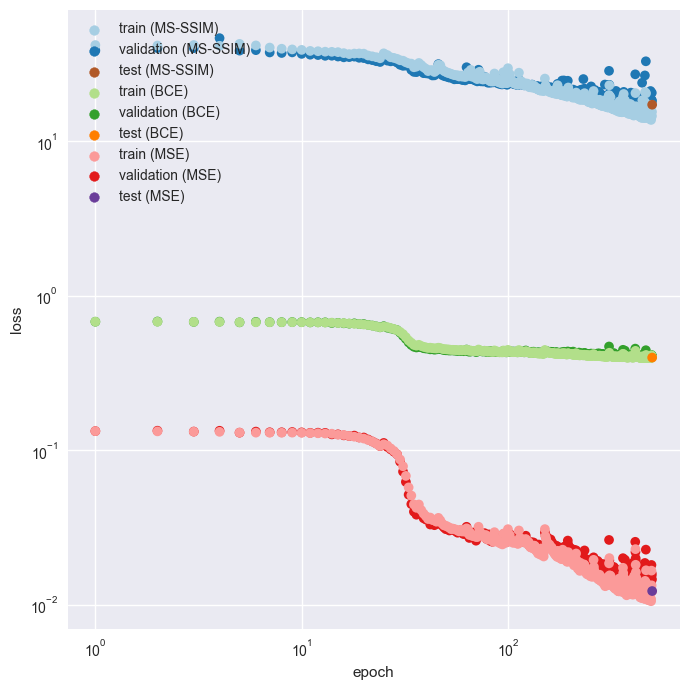

In [5]:
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

palette = ["#A6CEE3", "#1F78B4", "#B15928", "#B2DF8A", "#33A02C", "#FF7F00", "#FB9A99", "#E21A1B", "#6A3D9A"]

g = sns.scatterplot(data=dfm, x="epoch", y="loss", ax=ax, hue="cols", hue_order=
    ['train/loss_MS_SSIM_epoch', 'val/loss_MS_SSIM', 'test/loss_MS_SSIM',
     'train/loss_BCE_epoch', 'val/loss_BCE', 'test/loss_BCE',
     'train/loss_MSE_epoch', 'val/loss_MSE', 'test/loss_MSE'],
    palette=palette, linewidth=0
    
)
ax.set_xscale("log")
ax.set_yscale("log")

handles, labels = g.get_legend_handles_labels()
order = list(range(9))
labels = [
    "train (MS-SSIM)",
    "validation (MS-SSIM)",
    "test (MS-SSIM)",
    "train (BCE)",
    "validation (BCE)",
     "test (BCE)",
    "train (MSE)",
    "validation (MSE)",
    "test (MSE)",
]

g.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

plt.tight_layout()
plt.show()